In [34]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn import linear_model
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, roc_curve, auc
from IPython.display import Image

from IPython import display
display.set_matplotlib_formats('svg')

c:\Users\NC.DESKTOP-8TG1B6T\Envs\learnML\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  del sys.path[0]


In [3]:
cancer = load_breast_cancer()

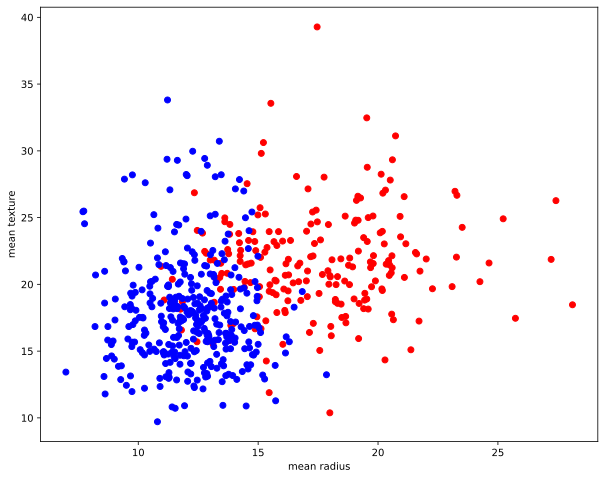

In [5]:
X = []
for target in range(2):
  X.append([[], []])
  for i in range(len(cancer.data)): # target is 0 or 1
    if cancer.target[i] == target:
      X[target][0].append(cancer.data[i][0]) # first feature - mean radius
      X[target][1].append(cancer.data[i][1]) # second feature - mean texture

colours = ("r", "b") # r: malignant, b: benign
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
for target in range(2):
  ax.scatter(X[target][0],X[target][1],c=colours[target])
ax.set_xlabel("mean radius")
ax.set_ylabel("mean texture")
plt.show()

# Train sử dụng 1 feature

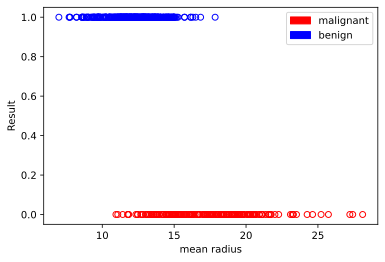

In [10]:
x = cancer.data[:,0] # mean radius
y = cancer.target # 0: malignant, 1: benign
colors = {0:'red', 1:'blue'} # 0: malignant, 1: benign
plt.scatter(x,y,facecolors='none',edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x:colors[x]),
cmap=colors)
plt.xlabel("mean radius")
plt.ylabel("Result")
red = mpatches.Patch(color='red', label='malignant')
blue = mpatches.Patch(color='blue', label='benign')
plt.legend(handles=[red, blue], loc=1)

In [12]:
log_regress = linear_model.LogisticRegression()

log_regress.fit(X = np.array(x).reshape(len(x),1),y = y)
#---print trained model intercept---
print(log_regress.intercept_) # [ 8.19393897]
#---print trained model coefficients---
print(log_regress.coef_) # [[-0.54291739]]

[15.120902]
[[-1.02475609]]


Text(0, 0.5, 'Probability')

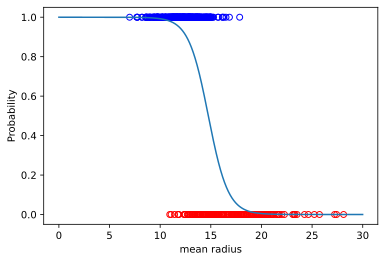

In [13]:
def sigmoid(x):
  return (1 / (1 + np.exp(-(log_regress.intercept_[0] + (log_regress.coef_[0][0] * x)))))

x1 = np.arange(0, 30, 0.01)
y1 = [sigmoid(n) for n in x1]
plt.scatter(x,y,facecolors='none',edgecolors=pd.DataFrame(cancer.target)[0].apply(lambda x:colors[x]),
cmap=colors)
plt.plot(x1,y1)
plt.xlabel("mean radius")
plt.ylabel("Probability")

In [15]:
print(log_regress.predict_proba([[20]])) # [[0.93489354 0.06510646]]
print(log_regress.predict([[20]])[0]) # 0

[[0.99538685 0.00461315]]
0


In [16]:
print(log_regress.predict_proba([[15]])) # [[0.56228462 0.43771538]]
print(log_regress.predict([[15]])[0]) # 0

[[0.56228462 0.43771538]]
0


# Train sử dụng toàn bộ feature

In [18]:
train_set, test_set, train_labels, test_labels = train_test_split(cancer.data,cancer.target, test_size = 0.25, random_state = 1, stratify = cancer.target) 

x = train_set[:,0:30] # mean radius
y = train_labels # 0: malignant, 1: benign
log_regress = linear_model.LogisticRegression()
log_regress.fit(x, y)

c:\Users\NC.DESKTOP-8TG1B6T\Envs\learnML\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

c:\Users\NC.DESKTOP-8TG1B6T\Envs\learnML\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


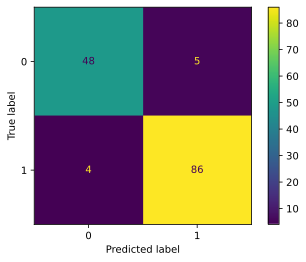

In [23]:
preds = log_regress.predict(test_set)
plot_confusion_matrix(log_regress, test_set, test_labels)  
plt.show()

In [27]:
print(f"Accuracy: {log_regress.score(X = test_set ,y = test_labels)*100} %")

Accuracy: 93.7062937062937 %


In [28]:
# https://rstudio-pubs-static.s3.amazonaws.com/267441_5459af9d83ae44f18a13aea4a479f31f.html

# Confusion matrix, ROC curve

In [29]:
# Confusion matrix
# 
#                  | Actually positive | Actually negative |
# -----------------|-------------------|-------------------|
# Predict positive |         TP        |        FP         |
# -----------------|-------------------|-------------------|
# Predict negative |         FN        |        TN         |
# -----------------|-------------------|-------------------|
# 
# accuracy = (TP + TN)/(TP+TN+FN+FP)
# precision = TP/(TP+FP)
# recall = TP/(TP+FN)
# F1-score = (2PR)/(P+R)

In [35]:
# ROC curve cho model trên 
#---find the predicted probabilities using the test set
probs = log_regress.predict_proba(test_set)
preds = probs[:,1]
#---find the FPR, TPR, and threshold---
fpr, tpr, threshold = roc_curve(test_labels, preds)

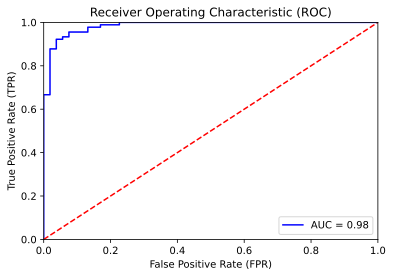

In [36]:
#---find the area under the curve---
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()

<p><b>Sai lầm loại I, II</b></p>
<p>sai lầm loại I: dự đoán là negative nhưng thực tế là positive (FN) và loại II: dự đoán là positive nhưng thực tế là negative (FP)</p>
<p>Độ rủi ro của sai lầm loại II lớn hơn với loại I, ví dụ:</p>
<ul>
<li>Loại I: Bản thân bệnh nhân hoàn toàn bình thường, bác sĩ kết luận bệnh nhân bị tiểu đường.</li>
<li>Loại II: Bệnh nhân bị tiểu đường nhưng bác sĩ kết luận hoàn toàn bình thường.</li>
</ul>
<p>Do vậy giữa 2 mô hình A và B, A có accuracy lớn hơn nhưng dự báo negative kém hơn mô hình B thì vẫn chọn mô hình B (đánh đổi để phát hiện rủi ro do thiệt hại sai lầm loại II nghiêm trọng hơn)</p>

<p><b>Sensitivity, Specitivity và False positive rate</b></p>

<ul>
  <li>Sensitivity: độ nhạy model còn gọi là TPR (True positive rate) cho biết mức độ dự báo chính xác trong nhóm sự kiện positive. TPR = recall</li>
  <li>Specificity: độ đặc hiệu được định nghĩa là tỷ lệ dự báo chính xác trong nhóm sự kiện negative. (=TN/(TN+FP))</li>
  <li>FPR: sai lầm mắc loại 2. FPR = 1-Specificity = FP/(TN+FP)</li>
</ul>

<p><b>ROC curve</b></p>
<p>Trục tung là TPR, trục hoành là FPR. Điểm (1,1) tương ứng với threshold=0 và (0,0) tương ứng threshold=1</p>
<p>Do tăng threshold thì TP và FP giảm nên TPR và FPR giảm và ngược lại. Vì ta muốn FPR nhỏ và TPR lớn nên tại điểm gần góc trái trên cùng của đồ thị ROC curve là điểm tốt nhất, ROC curve càng nằm trên bên trái càng tốt</p>

<p>Chọn threshold tùy thuộc vào khả năng chấp nhận FPR (chọn điểm TPR thấp hơn nhưng FPR thấp hoặc TPR cao hơn nhưng FPR cũng cao hơn)</p>

In [40]:
# Mô tả FPR, TPR thay đổi khi thay đổi threshold

<img src='image\ROC_curve.png'>

<img src='https://machinelearningmastery.com/wp-content/uploads/2018/08/ROC-Curve-Plot-for-a-No-Skill-Classifier-and-a-Logistic-Regression-Model.png'>

<p><b>AUC(Area under the ROC curve)</b></p>
<p>AUC là diện tích phần nằm dưới đường ROC dùng để so sánh giữa các mô hình khác nhau. AUC=1 mô hình hoàn hảo, AUC=0.5 mô hình ngẫu nhiên</p>